In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,0.7,0.3],
    [1.9,2.9,1.4],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2],
])

In [9]:
pf = pd.DataFrame(data, columns=['x','y','z'])

In [10]:
standardized_data = (pf - pf.mean()) / pf.std()

In [14]:
cov_matrix = standardized_data.cov()

In [15]:
eig_val,eig_vecs = np.linalg.eig(cov_matrix)

In [17]:
Sorted_indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[Sorted_indices]
eig_vecs = eig_vecs[:,Sorted_indices]

In [18]:
eig_vecs_subset = eig_vecs[:,:2]

In [20]:
reduced_data = np.dot(standardized_data.to_numpy(),eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data,columns=['PC1','PC2'])

In [21]:
print("\nReduced Data(after PCA) : \n",reduced_df)



Reduced Data(after PCA) : 
         PC1       PC2
0  1.240167  0.240671
1 -2.194030 -0.563867
2 -1.026885  1.251332
3  1.364811 -0.754841
4  2.575758  0.308386
5  1.618486 -0.287645
6  0.059887  0.263240
7 -1.486052 -0.279918
8 -0.390993 -0.214058
9 -1.761149  0.036701


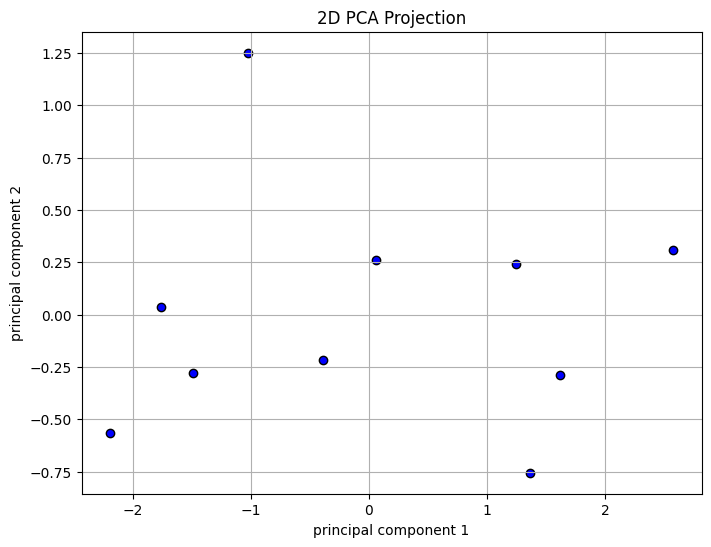

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],c='blue',edgecolors='k')
plt.title('2D PCA Projection')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.grid(True)
plt.show()